In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import pandas as pd

In [15]:
data = pd.read_csv("/content/drive/MyDrive/data cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
data.diagnosis.unique()
data_diagnosis_map = {'M':0,'B':1}
data['diagnosis'] = data['diagnosis'].map(data_diagnosis_map)
data.diagnosis.unique()

array([0, 1])

In [18]:
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [21]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X_std = StandardScaler().fit_transform(X)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [23]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=3, random_state=1, shuffle=True) 

for train_index, test_index in kf.split(X_scaled):
      print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = X_scaled[train_index], X_scaled[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [  1   2   7   8  10  12  13  14  15  20  21  22  23  24  25  26  27  28
  30  32  33  35  36  37  39  43  44  45  46  48  50  51  52  53  54  55
  56  57  60  61  63  64  70  71  72  73  74  75  76  77  79  80  81  82
  83  84  86  87  88  89  91  93  94  95  96  97  98  99 100 103 105 106
 108 109 112 113 114 115 116 118 122 123 125 126 127 129 130 131 134 136
 137 138 139 140 141 143 144 145 148 149 150 151 152 153 154 155 156 158
 163 164 166 167 169 170 171 174 175 176 177 178 181 182 183 184 185 188
 190 191 193 194 196 198 199 200 202 203 204 205 206 208 209 210 211 212
 213 215 216 217 218 219 220 222 224 226 227 228 229 230 231 234 235 238
 239 240 241 243 248 250 251 252 253 254 255 256 259 260 261 262 263 264
 265 266 267 269 270 271 272 275 276 278 279 280 281 282 287 288 290 294
 296 297 298 299 300 301 302 303 309 310 311 312 313 314 316 317 319 320
 321 322 323 325 327 328 330 331 332 333 336 337 338 339 340 341 343 345
 348 349 351 352 353 354 355 356 357 359 360

In [24]:
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [26]:
import numpy as np

class GaussianNaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.means = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for i, c in enumerate(self.classes):
            X_for_class_c = X[y==c]
            self.means[i, :] = X_for_class_c.mean(axis=0)
            self.var[i, :] = X_for_class_c.var(axis=0)
            self._priors[i] = X_for_class_c.shape[0] / float(n_samples)

    def _calculate_likelihood(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.var[class_idx]
        num = np.exp(- (x-mean)**2 / (2 * var))
        denom = np.sqrt(2 * np.pi * var)
        return num / denom

    def predict(self, X):
        y_pred = [self._classify_sample(x) for x in X]
        return np.array(y_pred)

    def _classify_sample(self, x):
        posteriors = []

        for i, c in enumerate(self.classes):
            prior = np.log(self._priors[i])
            posterior = np.sum(np.log(self._calculate_likelihood(i, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        return self.classes[np.argmax(posteriors)]

In [27]:
nb = GaussianNaiveBayes()
nb.fit(x_train, y_train)
predictions = nb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


In [28]:
from sklearn.metrics import accuracy_score
print(f"NumPy Naive Bayes accuracy: {accuracy_score(y_test, predictions)}")

NumPy Naive Bayes accuracy: 0.9417989417989417


In [29]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train, y_train)
predictions2 = classifier.predict(x_test)
print(f"NumPy Naive Bayes accuracy: {accuracy_score(y_test, predictions2)}")

NumPy Naive Bayes accuracy: 0.9417989417989417


In [30]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.94736842 0.91578947 0.94179894]
Accuracy: 0.935 (0.014)


[[ 61   5]
 [  7 117]]
##########


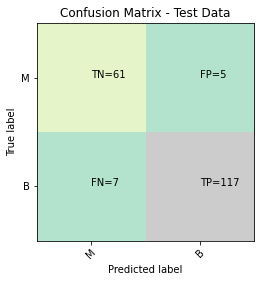

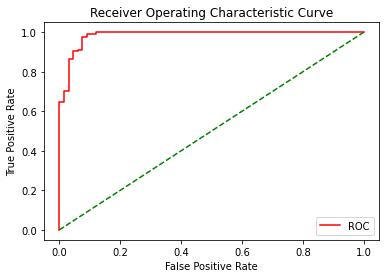

[[ 64  10]
 [  8 108]]
##########


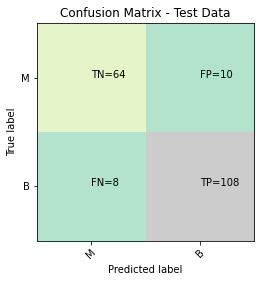

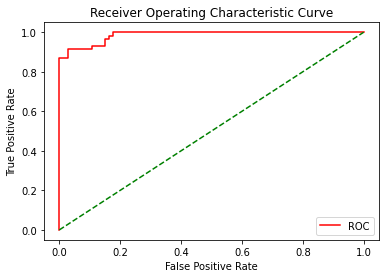

[[ 64   8]
 [  3 114]]
##########


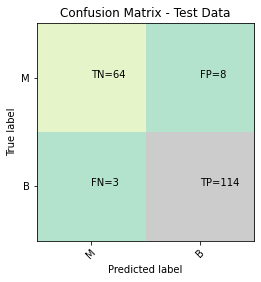

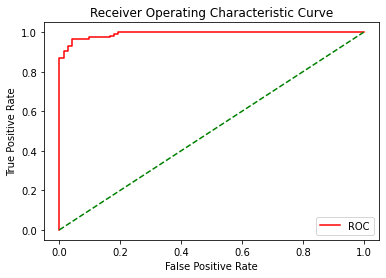

In [31]:
from sklearn.metrics import confusion_matrix
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
cm_holder = []
for train_index, test_index in kf.split(X_scaled):
      X_train, X_test = X_scaled[train_index], X_scaled[test_index] 
      y_train, y_test = y[train_index], y[test_index]
      classifier.fit(X_train, y_train)
      cm=confusion_matrix(y_test, classifier.predict(X_test))
      print (cm)
      print(10* '#')
      plt.clf()
      plt.imshow(cm, interpolation='nearest', cmap='Pastel2')
      classNames = ['M','B']
      plt.title('Confusion Matrix - Test Data')
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
      tick_marks = np.arange(len(classNames))
      plt.xticks(tick_marks, classNames, rotation=45)
      plt.yticks(tick_marks, classNames)
      s = [['TN','FP'], ['FN','TP']]
      for i in range(2):
          for j in range(2):
             plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]))
      plt.show()
      def plot_roc_curve(fper, tper):
         plt.plot(fper, tper, color='red', label='ROC')
         plt.plot([0, 1], [0, 1], color='green', linestyle='--')
         plt.xlabel('False Positive Rate')
         plt.ylabel('True Positive Rate')
         plt.title('Receiver Operating Characteristic Curve')
         plt.legend()
         plt.show()
      model =classifier
      model.fit(X_train, y_train)
      prob = model.predict_proba(X_test)
      prob = prob[:, 1]
      fper, tper, thresholds = roc_curve(y_test, prob)
      plot_roc_curve(fper, tper)